# First Part, loading the dataset and starting the basic exploration

In [ ]:
# For the final submission, I will import whole EDA that has been finished to add more content.

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 11 20:12:38 2018
@author: Patrick and Dino
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from num2words import num2words  # using (pip install num2words to install it on terminal )
import re  # this means regular expression
import romanclass as roman # using (pip install romanclass on terminal )
from datetime import datetime
import inflect
import unicodedata
p = inflect.engine()
"""
#one of these for each of the  filters. some of the simpler might be 
#doable with lambda expressions
def filter_words(review):
    # rewrite loop to go through strings
    #try and find string methods for simple operations
   
    #filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            if len(w) > 3:
                #filtered_sentence.append(w)
                filtered = ' ' + w 

    return filtered
"""

# populate a panda with necessary information for regression
#probably going to take a lot of computer time, so it might be easier to save 
#data to a new file. or put this in a seperate file
def preprocess(X_train):
    df = X_train
    
    #length
    #df['reviewText_filtered'] = df['reviewText'].apply(filter_words)
    
    df.loc['length'] = df['before'].apply(find_length)
    #one of these for each of the data columns
    #number of capital letters
    df['num_capitals'] = df['before'].apply(dertermine_cap_count)
    
    #number of lower case letters
    df['num_lower_case'] = df['before'].apply(determine_lower_count)
    
    # is alphanumeric
    df['alphanumeric'] = df['before'].apply(determine_alphanumeric)
    
    #any date format
    #fairly complex goal to determine if any string is a date
    # although packages exist to determine this, it will be more interesting
    #to make the algorithm determine date
    #df['date'] = df['before'].apply(determine_date)
        
    #onlyInteger
    df['only_integer'] = df['before'].apply(determine_only_integer)
    
    #justLetter
    df['only_letters'] = df['before'].apply(determine_only_letter)
    
    #contains /
    df['has_/'] = df['before'].apply(determine_slash)
    
    # contains - 
    df['has_-'] = df['before'].apply(determine_dash)
    
    #contains a month
    df['is_month'] = df['before'].apply(determine_month)
    
    #ends in s
    df['ends_s'] = df['before'].apply(determine_s)
    
    #contains a day of the week
    df['day_of_week'] = df['before'].apply(determine_weekday)
    
    #value of int #0 if not an int
    df['value_of_int'] = df['before'].apply(determine_int_value)
    
    #contains .
    df['has_.'] = df['before'].apply(determine_period)
    
    #contains unit of money or currency symbol
    df['is_money'] = df['before'].apply(determine_money)
    
    #all ints or signs
    df['sign_or_ints'] = df['before'].apply(determine_negative)
    
    #begins with hashtag
    df['start_hashtag'] = df['before'].apply(determine_hashtag)
    
    #sontains only 1
    df['only_one'] = df['before'].apply(determine_one)
    
    #contains metric unit
    df['contain_metric'] = df['before'].apply(determine_metric)
    
    #contains percent sign
    df['is_percent'] = df['before'].apply(determine_percent)
    
    #contains storage term
    df['storage_term'] = df['before'].apply(determine_storage_term)
    
    #surrounded by quotes
    df['quoted'] = df['before'].apply(determine_quotes)
    
    #contains comma
    df['has_comma'] = df['before'].apply(determine_comma)
    
    #contains colon
    df['has_colon'] = df['before'].apply(determine_colon)
    
    #place suffixx
    df['place_suffix'] = df['before'].apply(determine_suffix)
    
    #romanNum
    df['roman_numerals'] = df['before'].apply(determine_roman_numeral)
    
    #onlyPunct
    df['only_punct'] = df['before'].apply(determine_punct)
    
    #has parenthesis
    df['has_parenthesis'] = df['before'].apply(determine_paranthesis)
    
    #has_apostrophe
    df['has_apostrophe'] = df['before'].apply(determine_apostrophe)
    
    #has hat
    df['has_hat'] = df['before'].apply(determine_hat)
    
    #had e
    df['has_e'] = df['before'].apply(determine_e)
    
    #contains time zone
    df['time_zone'] = df['before'].apply(determine_time_zone)
    
    #symbol to be pronounced
    df['pronounced symbol'] = df['before'].apply(determine_pronounced)
    
    return df
    
#def experimental_data_analysis(df):
    
    
#perform a linear regression
#def learn_predict():
    

# use the determined classification to format it correctly
#def postprocess():
    
    
    """
    resultSet = learn_predict(X_test, X_train, y_train)
    print resultSet
    finalDataSet = postprocess(resultSet)
    print finalDataSet
    """
#define all necessary methods here
#including those for printing and preprocessing

"""
#one of these for each of the  filters. some of the simpler might be 
#doable with lambda expressions
def filter_words(review):
    # rewrite loop to go through strings
    #try and find string methods for simple operations
   
    #filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            if len(w) > 3:
                #filtered_sentence.append(w)
                filtered = ' ' + w 

    return filtered
"""

#length

    


#these methods are used for the postprocessing of the data
def is_num(key):
    if is_float(key) or re.match(r'^-?[0-9]\d*?$', key.replace(',','')): return True
    else: return False

def is_float(string):
    try:
        return float(string.replace(',','')) and "." in string # True if string is a number contains a dot
    except ValueError:  # String is not a number
        return False
    
def num2word(key):
    if re.match(r'^-?\d+$', key.replace(',','')):
        return digit2word(key)
    if is_float(key):
        return float2word(key)

def plain2word(key):
    return key

def punct2word(key):
    return key

def digit2word(key):
    try:
        text = p.number_to_words(key,decimal='point',andword='', zero='o')
        if re.match(r'^0\.',key): 
            text = 'zero '+text[2:]
        if re.match(r'.*\.0$',key): text = text[:-2]+' zero'
        text = text.replace('-',' ').replace(',','')
        return text.lower()
    except: return key
    
def currency2word(key):
        v = key.replace('$','').replace('US$','').split()
        if len(v) == 2: 
            if is_num(v[0]):
                text = num2word(v[0]) + ' '+ v[1] + ' '+ 'dollars'
        elif is_num(v[0]):
            text = num2word(v[0]) + ' '+ 'dollars'
        else:
            if 'm' in key or 'M' in key or 'million':
                text = p.number_to_words(key).replace(',','').replace('-',' ').replace(' and','') + ' million dollars'
            elif 'bn' in key:
                text = p.number_to_words(key).replace(',','').replace('-',' ').replace(' and','') + ' billion dollars'
            else: text = key
        return text.lower()

dict_m = {'"': 'inches', "'": 'feet', 'km/s': 'kilometers per second', 'AU': 'units', 'BAR': 'bars', 'CM': 'centimeters', 'mm': 'millimeters', 'FT': 'feet', 'G': 'grams', 
     'GAL': 'gallons', 'GB': 'gigabytes', 'GHZ': 'gigahertz', 'HA': 'hectares', 'HP': 'horsepower', 'HZ': 'hertz', 'KM':'kilometers', 'km3': 'cubic kilometers',
     'KA':'kilo amperes', 'KB': 'kilobytes', 'KG': 'kilograms', 'KHZ': 'kilohertz', 'KM²': 'square kilometers', 'KT': 'knots', 'KV': 'kilo volts', 'M': 'meters',
      'KM2': 'square kilometers','Kw':'kilowatts', 'KWH': 'kilo watt hours', 'LB': 'pounds', 'LBS': 'pounds', 'MA': 'mega amperes', 'MB': 'megabytes',
     'KW': 'kilowatts', 'MPH': 'miles per hour', 'MS': 'milliseconds', 'MV': 'milli volts', 'kJ':'kilojoules', 'km/h': 'kilometers per hour',  'V': 'volts', 
     'M2': 'square meters', 'M3': 'cubic meters', 'MW': 'megawatts', 'M²': 'square meters', 'M³': 'cubic meters', 'OZ': 'ounces',  'MHZ': 'megahertz', 'MI': 'miles',
     'MB/S': 'megabytes per second', 'MG': 'milligrams', 'ML': 'milliliters', 'YD': 'yards', 'au': 'units', 'bar': 'bars', 'cm': 'centimeters', 'ft': 'feet', 'g': 'grams', 
     'gal': 'gallons', 'gb': 'gigabytes', 'ghz': 'gigahertz', 'ha': 'hectares', 'hp': 'horsepower', 'hz': 'hertz', 'kWh': 'kilo watt hours', 'ka': 'kilo amperes', 'kb': 'kilobytes', 
     'kg': 'kilograms', 'khz': 'kilohertz', 'km': 'kilometers', 'km2': 'square kilometers', 'km²': 'square kilometers', 'kt': 'knots','kv': 'kilo volts', 'kw': 'kilowatts', 
     'lb': 'pounds', 'lbs': 'pounds', 'm': 'meters', 'm2': 'square meters','m3': 'cubic meters', 'ma': 'mega amperes', 'mb': 'megabytes', 'mb/s': 'megabytes per second', 
     'mg': 'milligrams', 'mhz': 'megahertz', 'mi': 'miles', 'ml': 'milliliters', 'mph': 'miles per hour','ms': 'milliseconds', 'mv': 'milli volts', 'mw': 'megawatts', 'm²': 'square meters',
     'm³': 'cubic meters', 'oz': 'ounces', 'v': 'volts', 'yd': 'yards', 'µg': 'micrograms', 'ΜG': 'micrograms', 'kg/m3': 'kilograms per meter cube'}

def measure2word(key):
    unit = dict_m[key.split()[-1]]
    val = key.split()[0]
    if is_num(val):
        val = num2word(val)
        text = val + ' ' + unit
    else: text = key
    return text

def url2word(key):
    key = key.replace('.',' dot ').replace('/',' slash ').replace('-',' dash ').replace(':',' colon ').replace('_',' underscore ')
    key = key.split()
    lis2 = ['dot','slash','dash','colon']
    for i in range(len(key)):
        if key[i] not in lis2:
            key[i]=" ".join(key[i])
    text = " ".join(key)
    return text.lower()

def telephone2word(key):
    key = key.replace('-','.').replace(')','.')
    text = p.number_to_words(key,group =1, decimal = "sil",zero = 'o').replace(',','')
    return text.lower()

dict_mon = {'jan': "January", "feb": "February", "mar ": "march", "apr": "april", "may": "may ","jun": "june", "jul": "july", "aug": "august","sep": "september",
            "oct": "october","nov": "november","dec": "december", "january":"January", "february":"February", "march":"march","april":"april", "may": "may", 
            "june":"june","july":"july", "august":"august", "september":"september", "october":"october", "november":"november", "december":"december"}
def date2word(key):
    v =  key.split('-')
    if len(v)==3:
        if v[1].isdigit():
            try:
                date = datetime.strptime(key , '%Y-%m-%d')
                text = 'the '+ p.ordinal(p.number_to_words(int(v[2]))).replace('-',' ')+' of '+datetime.date(date).strftime('%B')
                if int(v[0])>=2000 and int(v[0]) < 2010:
                    text = text  + ' '+digit2word(v[0])
                else: 
                    text = text + ' ' + digit2word(v[0][0:2]) + ' ' + digit2word(v[0][2:])
            except:
                text = key
            return text.lower()    
    else:   
        v = re.sub(r'[^\w]', ' ', key).split()
        if v[0].isalpha():
            try:
                if len(v)==3:
                    text = dict_mon[v[0].lower()] + ' '+ p.ordinal(p.number_to_words(int(v[1]))).replace('-',' ')
                    if int(v[2])>=2000 and int(v[2]) < 2010:
                        text = text  + ' '+digit2word(v[2])
                    else: 
                        text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])   
                elif len(v)==2:

                    if int(v[1])>=2000 and int(v[1]) < 2010:
                        text = dict_mon[v[0].lower()]  + ' '+ digit2word(v[1])
                    else: 
                        if len(v[1]) <=2:
                            text = dict_mon[v[0].lower()] + ' ' + digit2word(v[1])
                        else:
                            text = dict_mon[v[0].lower()] + ' ' + digit2word(v[1][0:2]) + ' ' + digit2word(v[1][2:])
                else: text = key
            except: text = key
            return text.lower()
        else: 
            key = re.sub(r'[^\w]', ' ', key)
            v = key.split()
            try:
                date = datetime.strptime(key , '%d %b %Y')
                text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+ dict_mon[v[1].lower()]
                if int(v[2])>=2000 and int(v[2]) < 2010:
                    text = text  + ' '+digit2word(v[2])
                else: 
                    text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
            except:
                try:
                    date = datetime.strptime(key , '%d %B %Y')
                    text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+ dict_mon[v[1].lower()]
                    if int(v[2])>=2000 and int(v[2]) < 2010:
                        text = text  + ' '+digit2word(v[2])
                    else: 
                        text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
                except:
                    try:
                        date = datetime.strptime(key , '%d %m %Y')
                        text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+datetime.date(date).strftime('%B')
                        if int(v[2])>=2000 and int(v[2]) < 2010:
                            text = text  + ' '+digit2word(v[2])
                        else: 
                            text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
                    except:
                        try:
                            date = datetime.strptime(key , '%d %m %y')
                            text = 'the '+ p.ordinal(p.number_to_words(int(v[0]))).replace('-',' ')+' of '+datetime.date(date).strftime('%B')
                            v[2] = datetime.date(date).strftime('%Y')
                            if int(v[2])>=2000 and int(v[2]) < 2010:
                                text = text  + ' '+digit2word(v[2])
                            else: 
                                text = text + ' ' + digit2word(v[2][0:2]) + ' ' + digit2word(v[2][2:])
                        except:text = key
            return text.lower() 


def float2word(key):
    key = float(key.replace(',',''))
    key = p.number_to_words(key,decimal='point',andword='', zero='o')
    if 'o' == key.split()[0]:
        key = key[2:]
    key = key.replace('-',' ').replace(',','')
    return key.lower()

def ordinal2word(key):
    
    """ The 1st part will solve the issue with rd, st"""
    # \d+, finding the digit part of the string
    foundInteger = re.findall('\d+', key)
    if len(foundInteger) == 0:
        roman_input = roman.fromRoman("X")
        result = num2words(roman_input, ordinal=True)
    elif len(foundInteger) > 0 and len(foundInteger) <= 1:
        result = num2words(int(foundInteger[0]), ordinal=True) 
    else:
        foundInteger = "".join(foundInteger)
        result = num2words(int(foundInteger), ordinal=True)
    
    return result     

def letter2word(key):
    s = key.lower()
    s = s.translate(None, s.punctuation)
    s = list(s)
    return s

def verbatim2word(key):
    return key

def time2word(key):
    key = key.lower() #lowcase the input
    s = re.split('\d+', key) # split the string as digit and letters
    if len(s[-1]) == 0:
        # we verify again
        s = re.split('\d+', key)
        if len(s[0]) > 0:
            # we process "pm2"
            number_part = re.findall('\d+', key)
            hour = int(number_part[0])
            hour = num2words(hour)

            s = re.split('\d+',time)
            s = s[0].lower()
            s = s.replace(' ','')
            s = " ".join(s)   

            result = hour + " " +  s
            return result
        else:
            # we process "8:35"
            number_part = re.findall('\d+', key)
            hour = int(number_part[0])
            hour = num2words(hour)
            minutes= int(number_part[1])
            minutes = num2words(minutes)
            result = hour + " " + minutes 
            print result
    else:
        # we process "8:35 pm est"
        s = s[-1]
        s = s.replace(' ','')
        s = " ".join(s) 
        number_part = re.findall('\d+', key)
        hour = int(number_part[0])
        hour = num2words(hour)
        minutes= int(number_part[1])
        minutes = num2words(minutes)
        result = hour + " " + minutes + " " + s
        return result
    
def address2word(key):
    str_part = re.split('\d+',key)
    str_part = str(str_part[0]).lower()
    num_part = re.findall('\d+', key)
    # drop the address with "."
    if str_part.find('.'):
        str_part = str_part.replace("."," ").lower()
        key = key.replace(".","") # Changing the original key 
    
    #1st: "-" SR-123
    if key.find("-") > 0:
        if len(num_part[0]) == 3:
            if int(num_part[0][0]) >=0 and int(num_part[0][1]) >= 0:
                left = num2words(int(num_part[0][0]))
                right = num2words(int(num_part[0][1:]))
                result = left + " " + right
                result = str_part + " " + result
                print result
            else:
                num_part = int(num_part[0])    
                num_part = num2words(num_part)
                num_part = num_part.replace("-"," ")
                result = str_part +" " + num_part
                print result   
    elif key.find("-") == -1 and int(num_part[0][0]) == 0 or len(num_part[0][0]) == 5 :
        return funky(key)
    else:
        if len(num_part[0]) == 3:
            if int(num_part[0][0]) >=0 and int(num_part[0][1]) >= 0:
                left = num2words(int(num_part[0][0]))
                right = num2words(int(num_part[0][1:]))
                result = left + " " + right
                result = str_part + " " + result
                print result
        else:
            num_part = int(num_part[0])    
            num_part = num2words(num_part)
            num_part = num_part.replace("-"," ")
            result = str_part +" " + num_part
            print result

def funky(key):
    
    str_part = re.split('\d+',key)
    str_part = str(str_part[0]).lower()
    num_part = re.findall('\d+', key)

    num=""
    b=0
    for a in range(len(num_part[0])):
        if int(num_part[0][a]) == 0:
            b = b +1
    
    if b ==len(num_part[0]):
        num_part ='zero'
    else:
        for a in range(len(num_part[0])):
            n = int(num_part[0][a])
            if n == 0:
                output = "o"
                num = num + " " + output
            else:
                output = num2words(n)
                num = num + " " + output
        num_part = num

    result = str_part +" " + num_part
    return result

def frac2word(key):
     #a = "7½" # length will not work, we need a unique way to distinguish it  
    key = key.decode('utf-8') # We need to use this to process unique part
    key = list(key)
    if key[-1] == u'\xbd' or key[-1] == u'\xbc':
        #the we process a
        key = "".join(key)
        key = unicodedata.normalize('NFKD', key).encode('ascii','ignore')
        left = int(key[-2])
        right = int(key[-1])
        num = num2words(int(key[0]))
        if right /float(left) == 4:
            result = "one quarters"
            result = num + " and " + result
            return result
        elif right/ float(left) == 2:
            result = " and half"
            result = num + result
            return result
        elif right/ float(left):
            result = "three quarters"
            result = num + " and " + result
            return result
    else:
        key = "".join(key)
        key = unicodedata.normalize('NFKD', key).encode('ascii','ignore') # unicode to string
        key = key.split("/")
        left = int(key[0])
        right = int(key[1])
        number = left/float(right)
        if number == 4 or  number == 2:
            # we process quater
            if right /float(left) == 1:
                result = "one quarters"
                return result
            elif right/ float(left) == 2:
                result = "two quarters"
                return result
            elif right/ float(left):
                result = "three quarters"
                return result
        else:
            # we process 1/2007
            left = num2words(left)
            left = left.replace("-"," ")
            right = num2words(right)
            right = right.replace("-"," ")
            right = right +"ths"
            result = left + " " + right
            return result
 
 #all of these accept a string and return some form of an integer
# a 0 or 1 is used for boolean values      
#number of capital letters

def find_length(key):
    word = str(key)
    return len(word)

#returns an int

def dertermine_cap_count(word):
    word = str(word)
    count = len([letter for letter in word if letter.isupper()])
    return count

#number of lower case letters
#returns an int       
def determine_lower_count(word):
    word = str(word)
    count = len(word) - len([letter for letter in word if letter.isupper()])
    return count

# is alphanumeric
#returns an int
def determine_alphanumeric(word):
    string = str(word)
    if string.isalnum():
        return 1
    return 0

#is euro-date format
#returns 0 or 1
#def determine_date(word):
#    if determine_only_integer(word) != 0  :
#        
#        string = str(word)
#        try:
#            parse(string)
#            return 1
#        except ValueError:
#            return 0
#    return 0
# is onlyInteger
#returns 0 or 1
def determine_only_integer(word):
    word = str(word)
    if word.isdigit():
        return 1
    return 0

#justLetter
#returns 0 or 1
def determine_only_letter(word):
    word = str(word)
    if word.isalpha():
        return 1
    return 0

#contains /
#returns 0 or 1
def determine_slash(word):
    word = str(word)
    if word.find('/', 0, len(word)):
        return 1
    return 0

 # contains - 
 # returns 0 or 1
def determine_dash(word):
    word = str(word)
    if word.find('-', 0, len(word)):
        return 1
    return 0

#contains a month
#returns 0 or 1
def determine_month(word):
    word = str(word)
    neword = word.lower()
    day_of_week = ['january', 'february', 'march','april','may','june','july', 'august', 'september','october','november','december']
    for day in day_of_week:
        if day in neword  :
            return 1
    return 0

#ends in s
# returns 0 or 1
def determine_s(word):
    word = str(word)
    if word.find('-', len(word)-1, len(word)):
        return 1
    return 0


#contains a day of the week
#returns 0 or 1
def determine_weekday(word):
    word = str(word)
    neword = word.lower()
    day_of_week = ['monday', 'tuesday', 'wednesday','thursday','friday','saturday','sunday']
    for day in day_of_week:
        if day in neword  :
            return 1
    return 0

#value of int #0 if not an int
#returns 0 or  the integer
def determine_int_value(word):
    word = str(word)
    if word.isdigit():
        return float(word)
    return 0

#contains .
#returns 0 or 1
def determine_period(word):
    word = str(word)
    if word.find('.', 0,  len(word)):
        return 1
    return 0

#contains unit of money or currency symbol
#returns 0 or 1
def determine_money(word):
    neword = str(word)
    day_of_week = ['$', '¥','€','£']
    for day in day_of_week:
        if day in neword  :
            return 1
    return 0

#all ints or signs
#returns 0 or 1
def determine_negative(word):
    try:
        if (float(word) < 0) :
            return 1
        return 0
    except ValueError:  
          return 0
#begins with hashtag
#reteurns 0 or 1
def determine_hashtag(word):
    word = str(word)
    if word.find('#', 0,  1):
        return 1
    return 0

#contains only 1
#returns 0 or 1
def determine_one(word):
    word = str(word)
    if word.isdigit():
        if (int(word) == 1) :
            return 1
    return 0

#contains metric unit
#returns 0 or 1
#possibly add more symbols
def determine_metric(word):
    word = str(word)
    neword = word.lower()
    day_of_week = ['m', 'mm', 'cm','km','mg','g','kg','t','s','C','m','ha','l','m/s']
    for day in day_of_week:
        if day in neword  :
            return 1
    return 0

#contains percent sign
#returns 0 or 1
def determine_percent(word):
    word = str(word)
    if word.find('%', 0,  len(word)):
        return 1
    return 0

#contains storage term
#returns 0 or 1 
# add more to this list
def determine_storage_term(word):
    word = str(word)
    neword = word.lower()
    day_of_week = ['bit''b', 'kb', 'mb','gb','tb']
    for day in day_of_week:
        if day in neword  :
            return 1
    return 0

#surrounded by quotes
#returns 0 or 1 
def determine_quotes(word):
    word = str(word)
    if word.find('"', 0, 1):
        if word.find('"', len(word) -1,  len(word)):
            return 1
        return 0
    return 0

#contains comma
#returns 0 or 1 
def determine_comma(word):
    word = str(word)
    if word.find(',', 0,  len(word)):
        return 1
    return 0

#determine if there is a colon
#returns 0 or 1
def determine_colon(word):
    word = str(word)
    if word.find(':', 0,  len(word)) :
        return 1
    return 0

#place suffix
#returns 0 or 1 
def determine_suffix(word):
    word = str(word)
    characters = ['I', 'V','X','L', 'C', 'D','M']
    for character in characters:
        if character in word  :
            return 1
    return 0

#romanNum
#returns 0 or 1 
#might have to use a different approach
def determine_roman_numeral(word):
    word = str(word)
    characters = ['I', 'V','X','L', 'C', 'D','M']
    for character in characters:
        if character in word  :
            return 1
    return 0

#onlyPunct
#returns 0 or 1 
def determine_punct(word):
    word = str(word)
    characters = ['.', ",",';',':','-',",","(",'{',")" ]
    for character in characters:
        if character in word  :
            return 1
    return 0

#has parenthesis
#returns 0 or 1 
def determine_paranthesis(word):
    word = str(word)
    characters = ["(" ,")" ,"{","}"]
    for character in characters:
        if character in word  :
            return 1
    return 0
#has_apostrophe
#returns 0 or 1 
def determine_apostrophe(word):
    word = str(word)
    if word.find("'", 0,  len(word)):
            return 1   
    return 0

#has hat
#returns 0 or 1 
def determine_hat(word):
    word = str(word)
    if word.find('^', len(word) -1,  len(word)):
            return 1
    return 0

#had e
#returns 0 or 1 
def determine_e(word):
    word = str(word)
    if word.find('e', len(word) -1,  len(word)):
            return 1
    return 0

#contains time zone
#returns 0 or 1 
def determine_time_zone(word):
    df1 =  0
    
    return df1

#symbol to be pronounced
#returns 0 or 1 
def determine_pronounced(word):
    df1 = 0
    
    return df1


    
if __name__ == "__main__":
    main()

/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/

/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:135: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

                 before  num_capitals  num_lower_case  alphanumeric  \
2482253         Angiulo             1               6             1   
1928389  administrative             0              14             1   
9065915          Twenty             1               5             1   
2534598           which             0               5             1   
9300392      Panganiban             1               9             1   
7051623              in             0               2             1   
4425420        Terrence             1               7             1   
2368021              to             0               2             1   
7507526           Human             1               4             1   
3974096               ,             0               1             0   
3329518            down             0               4             1   
2608999          strike             0               6             1   
4803203              in             0               2             1   
775495

In [ ]:
## Before I can go any further, it is time to re-examine the methods he has created.
## Debug his work and clearn the dataset


## The goal is to creat the dataset and making 

In [151]:
dataset = main()

def main():
    
    # get data into panda
    df = pd.read_csv('../Desktop/python/project_dataset/en_train.csv')
    # seperate given classifications from data set
    #print df
    # populate x with the starting strings
    X = df[['before']]
    # populate Y with the result class
    y = df[['class']]
    #print X
    #print y
    #temp = digit2word('111')
    #print temp
    # splits X and Y into test and train portions
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.9999)
    
    #experimental_data_analysis(df)
    dataset = preprocess(X_train)
    return dataset       

if __name__ == "__main__":
    main()

/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/

/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:138: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zouxinzhi/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [153]:
dataset.drop(dataset.tail(1).index,inplace=True)
dataset.drop('before', axis=1, inplace=True)

print dataset

         num_capitals  num_lower_case  alphanumeric  only_integer  \
345315              0               3             1             0   
152358              0               6             1             0   
5747070             0              13             0             0   
326253              1               4             1             0   
5764246             1               6             1             0   
7468203             0               1             0             0   
7005639             0               2             1             0   
1713035             1              14             0             0   
1684720             0               4             1             0   
4370304             0               1             0             0   
1009364             0               5             1             0   
4252933             0               2             1             0   
4310550             1              10             0             0   
7004981             1             

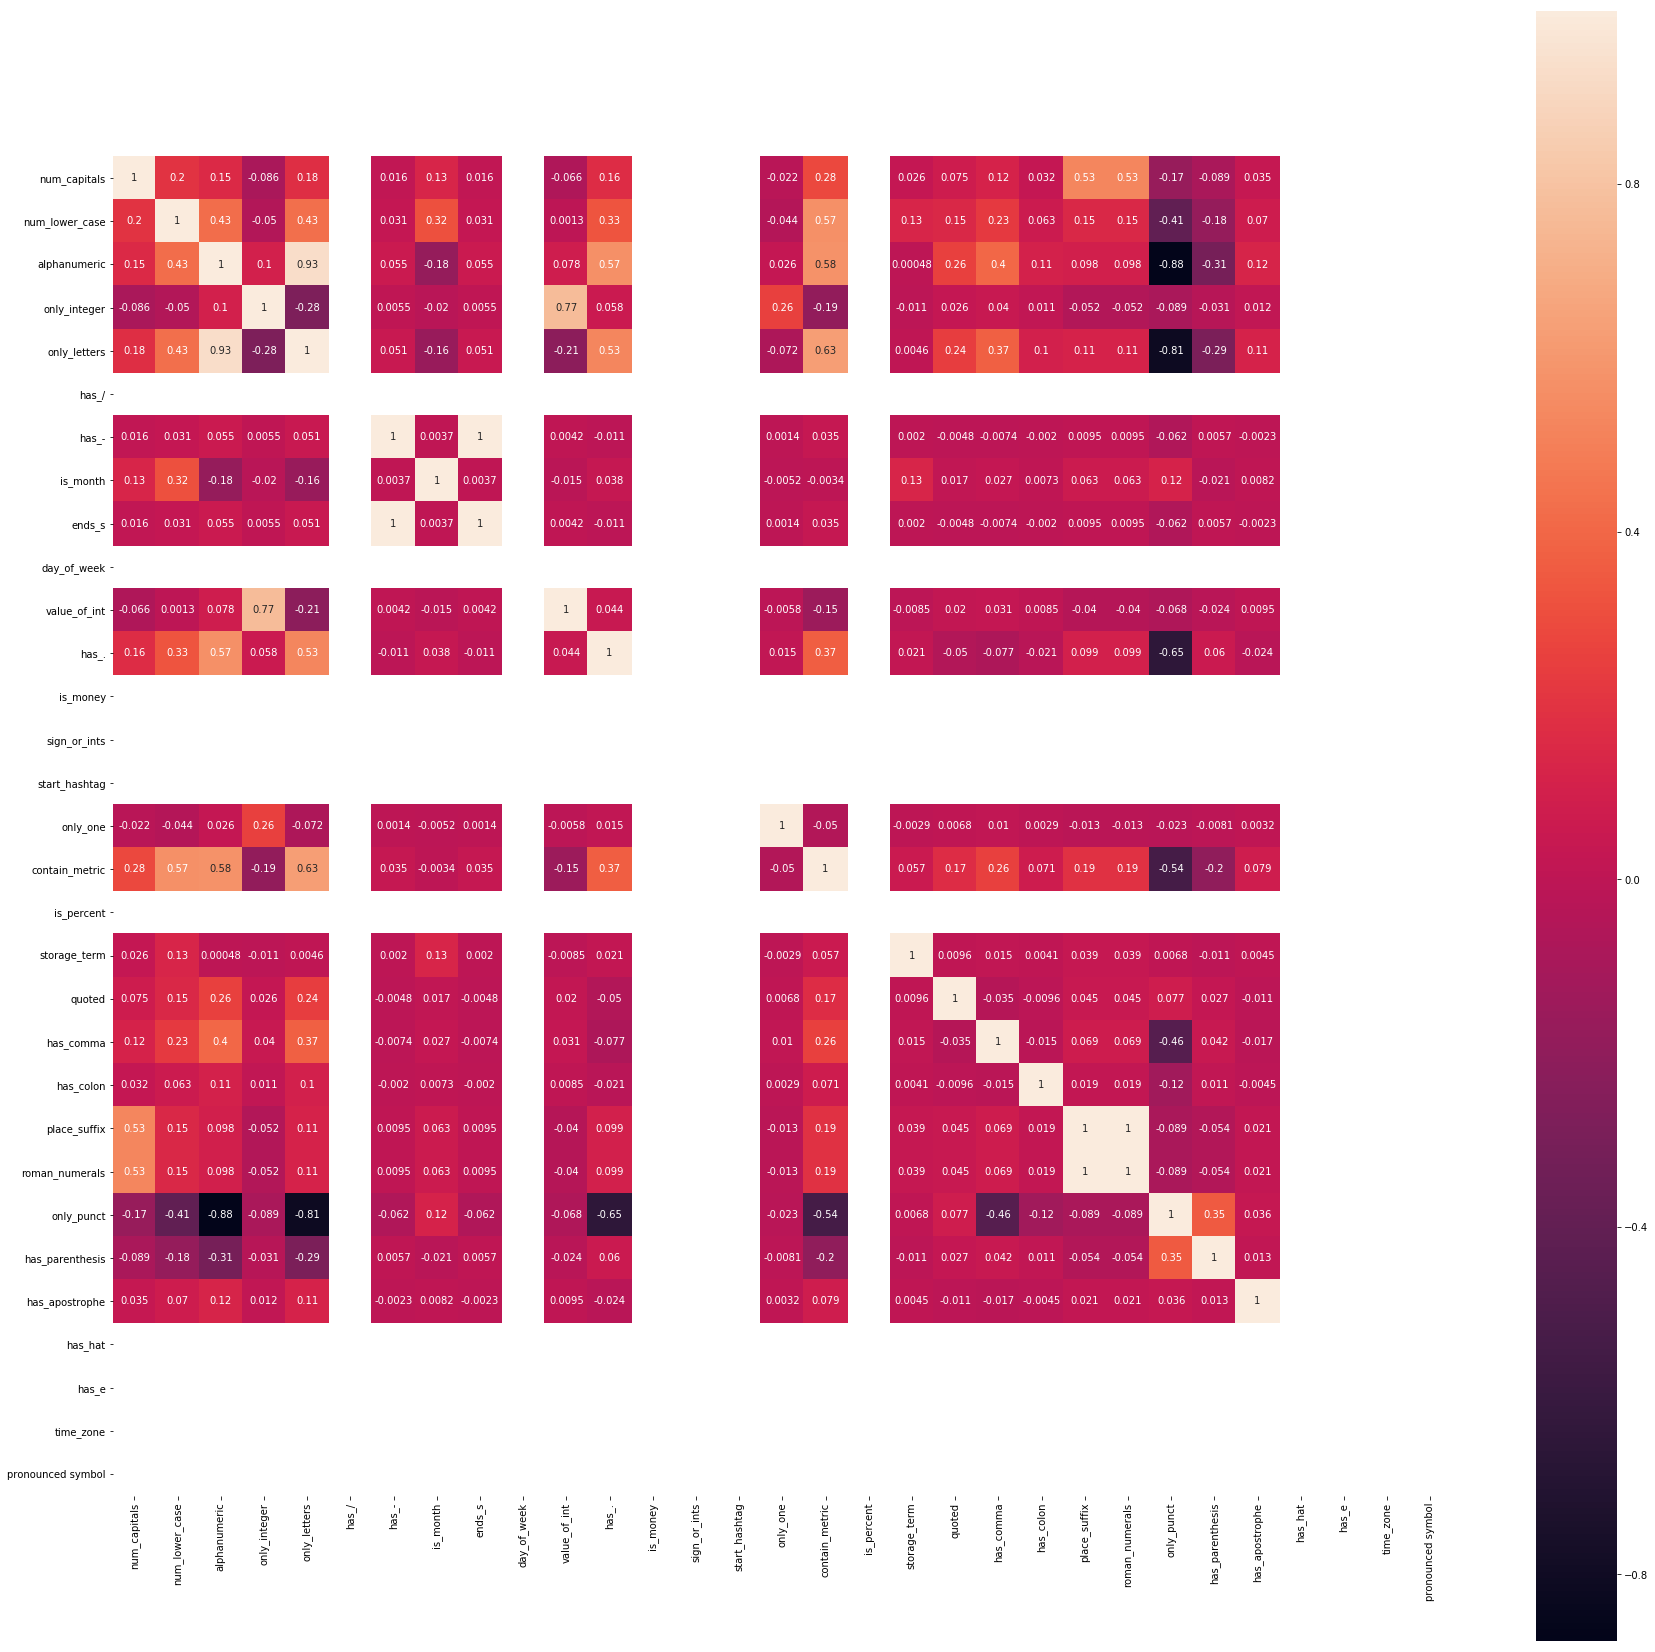

In [96]:
import seaborn as sns
matrix= pd.DataFrame(dataset)
corr = matrix.corr()
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(corr,annot=True,square=True)

In [139]:
# Data Processing Fundamental Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [104]:
classifier = LogisticRegression(random_state=0)
classifier.fit(dataset, y_train)
y_pred = classifier.predict(dataset)

# It seems like logitsticRegression is not working properly 

In [154]:
# This seems like working properly
"""
   so, if machine learning has successfully judged which class belongs to which, 
   then we will have use the our method to do the transformation 
   
"""
naive = MultinomialNB()
naive.fit(dataset, y_train)
# training is done 
y_pred = naive.predict(dataset)
y_pred



array(['CARDINAL', 'LETTERS', 'LETTERS', 'LETTERS', 'LETTERS', 'CARDINAL',
       'CARDINAL', 'LETTERS', 'LETTERS', 'LETTERS', 'LETTERS', 'CARDINAL',
       'LETTERS', 'VERBATIM', 'LETTERS', 'CARDINAL', 'CARDINAL', 'LETTERS',
       'CARDINAL', 'LETTERS', 'CARDINAL', 'CARDINAL', 'CARDINAL',
       'LETTERS', 'LETTERS', 'LETTERS', 'CARDINAL', 'LETTERS', 'LETTERS',
       'CARDINAL', 'LETTERS', 'LETTERS', 'LETTERS', 'CARDINAL', 'CARDINAL',
       'LETTERS', 'LETTERS', 'VERBATIM', 'VERBATIM', 'CARDINAL', 'LETTERS',
       'LETTERS', 'CARDINAL', 'LETTERS', 'CARDINAL', 'VERBATIM',
       'CARDINAL', 'LETTERS', 'CARDINAL', 'CARDINAL', 'PLAIN', 'LETTERS',
       'CARDINAL', 'LETTERS', 'LETTERS', 'LETTERS', 'LETTERS', 'VERBATIM',
       'LETTERS', 'LETTERS', 'LETTERS', 'CARDINAL', 'CARDINAL', 'CARDINAL',
       'CARDINAL', 'LETTERS', 'LETTERS', 'CARDINAL', 'LETTERS', 'LETTERS',
       'LETTERS', 'VERBATIM', 'VERBATIM', 'LETTERS', 'LETTERS', 'LETTERS',
       'LETTERS', 'CARDINAL', 'CARDINAL', 

In [169]:
new_index= [range(0,991)]
y_train.index = new_index
print y_train

        class
0       PUNCT
1       PLAIN
2       PLAIN
3       PLAIN
4       PLAIN
5       PUNCT
6       PLAIN
7       PLAIN
8       PLAIN
9       PLAIN
10      PLAIN
11      PLAIN
12      PUNCT
13      PLAIN
14      PLAIN
15      PUNCT
16      PLAIN
17      PUNCT
18    LETTERS
19      PLAIN
20      PLAIN
21      PLAIN
22   VERBATIM
23      PLAIN
24      PLAIN
25      PLAIN
26      PLAIN
27      PLAIN
28      PLAIN
29      PLAIN
..        ...
961     PUNCT
962     PLAIN
963     PUNCT
964     PLAIN
965     PLAIN
966     PLAIN
967     PLAIN
968     PUNCT
969     PLAIN
970   LETTERS
971     PLAIN
972     PLAIN
973     PLAIN
974     PLAIN
975     PUNCT
976     PLAIN
977     PUNCT
978     PLAIN
979     PLAIN
980   ORDINAL
981     PUNCT
982     PLAIN
983     PUNCT
984     PLAIN
985     PLAIN
986     PLAIN
987     PLAIN
988     PLAIN
989     PLAIN
990      DATE

[991 rows x 1 columns]


In [178]:
for a in range(991):
    print y_train['class'][a] == y_pred[a]

0    False
Name: class, dtype: bool
1    False
Name: class, dtype: bool
2    False
Name: class, dtype: bool
3    False
Name: class, dtype: bool
4    False
Name: class, dtype: bool
5    False
Name: class, dtype: bool
6    False
Name: class, dtype: bool
7    False
Name: class, dtype: bool
8    False
Name: class, dtype: bool
9    False
Name: class, dtype: bool
10    False
Name: class, dtype: bool
11    False
Name: class, dtype: bool
12    False
Name: class, dtype: bool
13    False
Name: class, dtype: bool
14    False
Name: class, dtype: bool
15    False
Name: class, dtype: bool
16    False
Name: class, dtype: bool
17    False
Name: class, dtype: bool
18    False
Name: class, dtype: bool
19    False
Name: class, dtype: bool
20    False
Name: class, dtype: bool
21    False
Name: class, dtype: bool
22    False
Name: class, dtype: bool
23    False
Name: class, dtype: bool
24    False
Name: class, dtype: bool
25    False
Name: class, dtype: bool
26    False
Name: class, dtype: bool
27    False

Name: class, dtype: bool
271    False
Name: class, dtype: bool
272    False
Name: class, dtype: bool
273    False
Name: class, dtype: bool
274    False
Name: class, dtype: bool
275    False
Name: class, dtype: bool
276    False
Name: class, dtype: bool
277    False
Name: class, dtype: bool
278    False
Name: class, dtype: bool
279    False
Name: class, dtype: bool
280    False
Name: class, dtype: bool
281    False
Name: class, dtype: bool
282    False
Name: class, dtype: bool
283    False
Name: class, dtype: bool
284    False
Name: class, dtype: bool
285    False
Name: class, dtype: bool
286    False
Name: class, dtype: bool
287    True
Name: class, dtype: bool
288    False
Name: class, dtype: bool
289    False
Name: class, dtype: bool
290    False
Name: class, dtype: bool
291    False
Name: class, dtype: bool
292    False
Name: class, dtype: bool
293    False
Name: class, dtype: bool
294    False
Name: class, dtype: bool
295    False
Name: class, dtype: bool
296    False
Name: class, 

Name: class, dtype: bool
503    False
Name: class, dtype: bool
504    False
Name: class, dtype: bool
505    False
Name: class, dtype: bool
506    False
Name: class, dtype: bool
507    False
Name: class, dtype: bool
508    False
Name: class, dtype: bool
509    False
Name: class, dtype: bool
510    False
Name: class, dtype: bool
511    False
Name: class, dtype: bool
512    False
Name: class, dtype: bool
513    False
Name: class, dtype: bool
514    True
Name: class, dtype: bool
515    True
Name: class, dtype: bool
516    False
Name: class, dtype: bool
517    False
Name: class, dtype: bool
518    False
Name: class, dtype: bool
519    False
Name: class, dtype: bool
520    False
Name: class, dtype: bool
521    False
Name: class, dtype: bool
522    False
Name: class, dtype: bool
523    False
Name: class, dtype: bool
524    False
Name: class, dtype: bool
525    False
Name: class, dtype: bool
526    False
Name: class, dtype: bool
527    False
Name: class, dtype: bool
528    False
Name: class, d

Name: class, dtype: bool
827    False
Name: class, dtype: bool
828    False
Name: class, dtype: bool
829    False
Name: class, dtype: bool
830    False
Name: class, dtype: bool
831    False
Name: class, dtype: bool
832    False
Name: class, dtype: bool
833    False
Name: class, dtype: bool
834    False
Name: class, dtype: bool
835    False
Name: class, dtype: bool
836    False
Name: class, dtype: bool
837    False
Name: class, dtype: bool
838    False
Name: class, dtype: bool
839    False
Name: class, dtype: bool
840    False
Name: class, dtype: bool
841    False
Name: class, dtype: bool
842    False
Name: class, dtype: bool
843    False
Name: class, dtype: bool
844    False
Name: class, dtype: bool
845    False
Name: class, dtype: bool
846    False
Name: class, dtype: bool
847    False
Name: class, dtype: bool
848    False
Name: class, dtype: bool
849    False
Name: class, dtype: bool
850    False
Name: class, dtype: bool
851    False
Name: class, dtype: bool
852    False
Name: class,

In [177]:
y_train['class'][0] == 'PUNCT'

0    True
Name: class, dtype: bool